In [1]:
# Let's see how well the WCS does if I use it on a frame from a new night
%matplotlib inline
from wcs_utils import apply_wcs_to_photometry, match_catalog, radec2altaz, trim_stars, robustRMS
from astropy.table import Table, vstack, hstack
import numpy as np
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.io import fits
import matplotlib.pylab as plt
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from read_ybc import readYBC
import astropy.units as u
import lsst.all_sky_phot.wcs as asp

from scipy.optimize import minimize
import glob
from lsst.all_sky_phot import readcr2
from phot_night import phot_files

In [2]:
# Load up the initial WCS fit
hdulist = fits.open('wcs_full_night.fits')
w = wcs.WCS(hdulist[0].header)
hdulist.close()

# Load the Yale bright star catalog
ybc = readYBC()
ybc_bright = np.where(ybc['Vmag'].values < 4)
ybc_cat = SkyCoord(ra=ybc['RA'].values[ybc_bright]*u.degree, dec=ybc['Dec'].values[ybc_bright]*u.degree)

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less


In [3]:
filename = 'ut012716/ut012716.0168.long.cr2'
im, header = readcr2(filename)
sum_image = np.sum(im, axis=2).astype(float)
phot_tables = phot_files([filename], savefile=None)

reading image
background
finding sources
doing photometry
progress = 0.00%

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


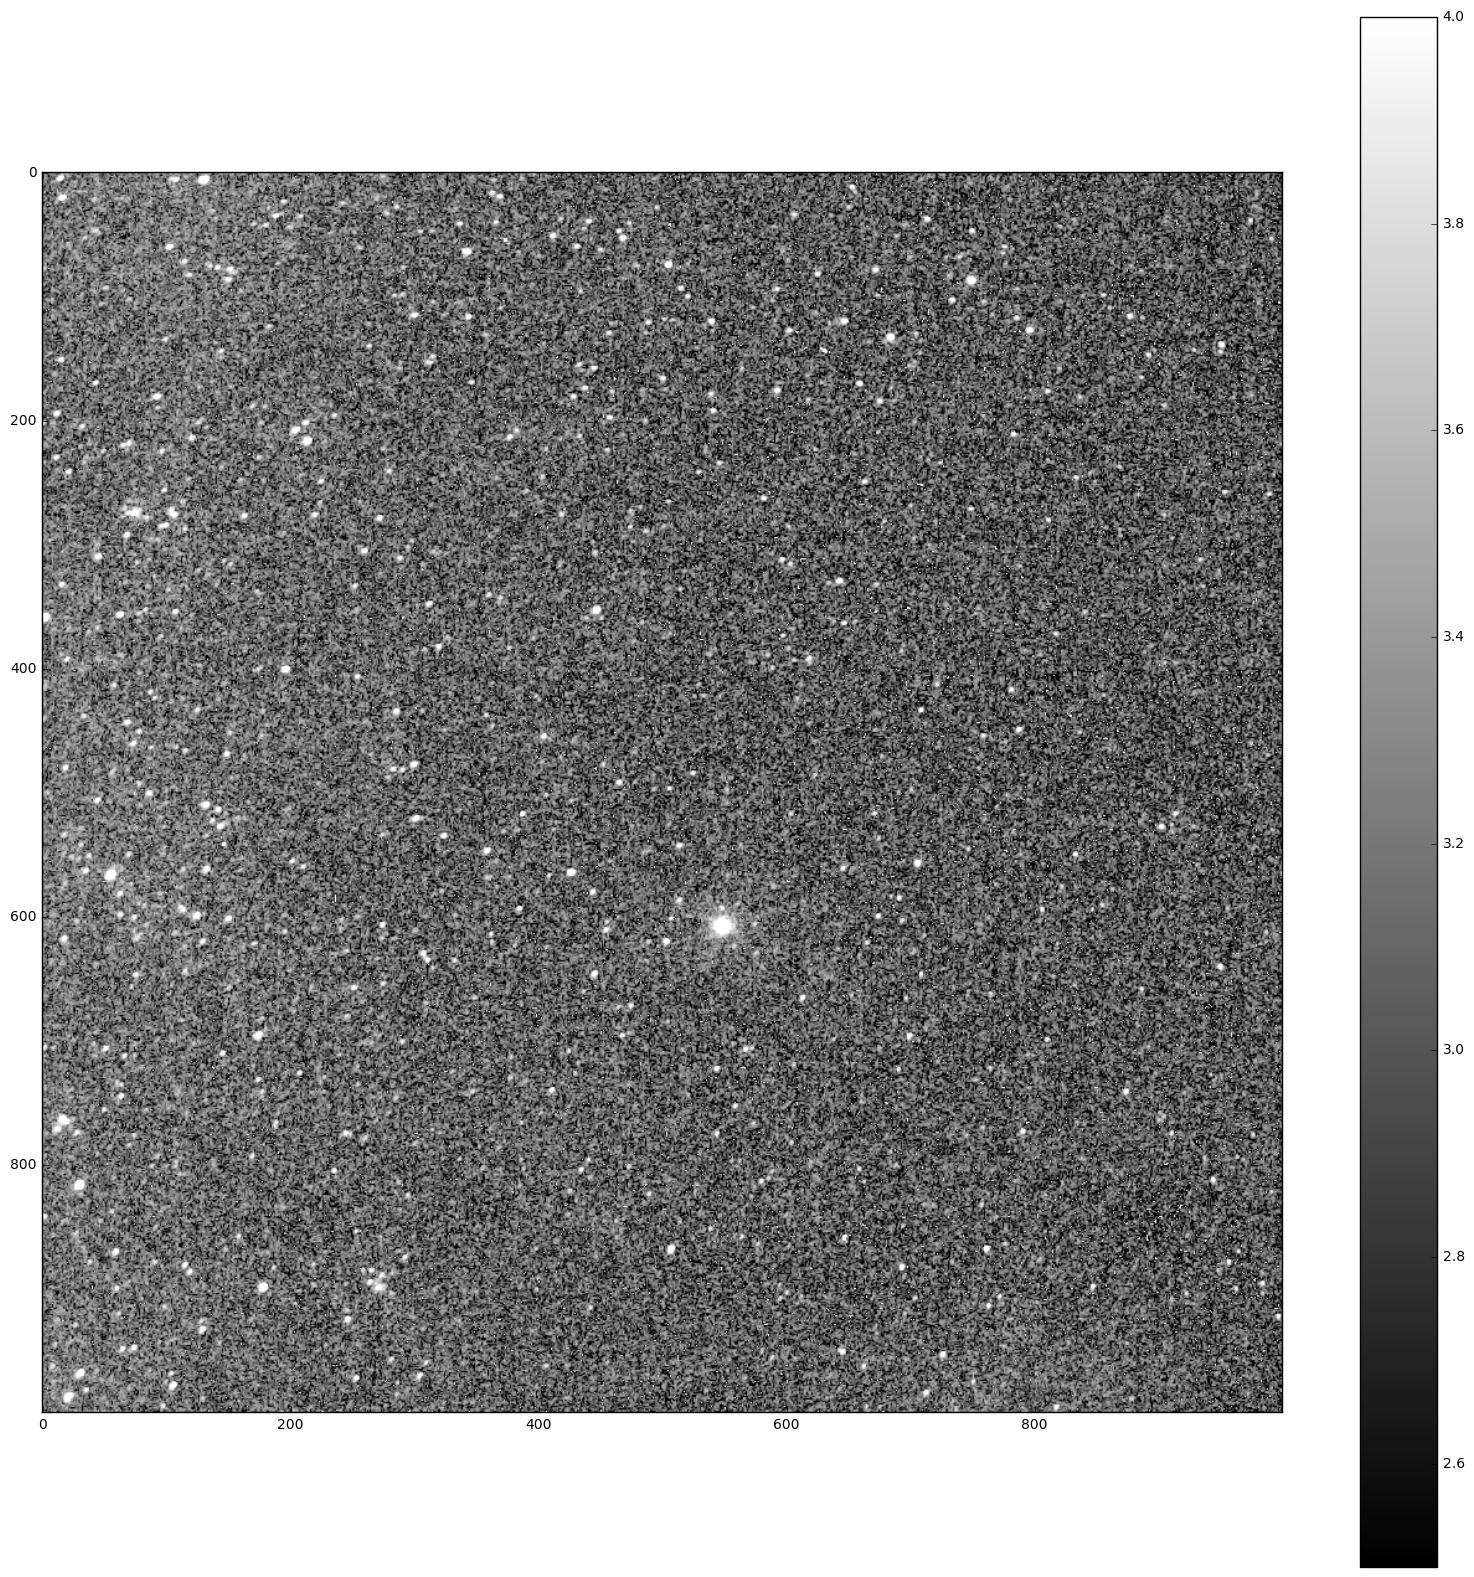

In [8]:
plt.figure(figsize=[20,20])
plt.imshow(np.log10(sum_image[2000:3000, 2000:3000]),cmap='gray',  vmin=2.5, vmax=4)
plt.colorbar()

In [43]:
# OK, let's see where we expect the stars to be
lsst_location = EarthLocation(lat=-30.2444*u.degree, lon=-70.7494*u.degree, height=2650.0*u.meter)
alt, az = radec2altaz(ybc['RA'], ybc['Dec'], header['mjd'], location=lsst_location)
above = np.where(alt > 30.)
x_expected, y_expected = w.all_world2pix(az[above], alt[above], 0.)

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


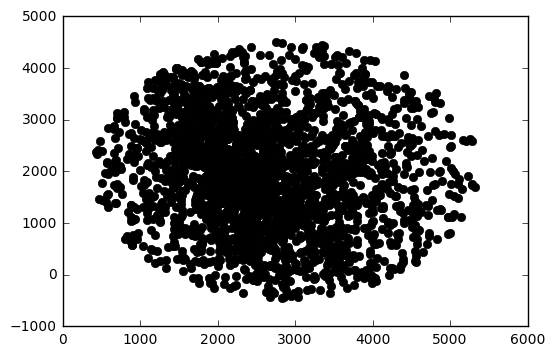

In [44]:
plt.plot(x_expected, y_expected, 'ko')

In [ ]:
# Let's do forced photometry at all the expected points!